<a href="https://colab.research.google.com/github/LordRelentless/NGFTSimulations/blob/main/Simulation_5_3_3_%E2%80%94_GUIFT_Informational_Wave_Propagation_%26_Crystallization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
using Pkg
Pkg.add("Yao") # Quantum simulation engine
Pkg.add("Plots")        # Visualization
Pkg.add("Random")
Pkg.add("StatsBase")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


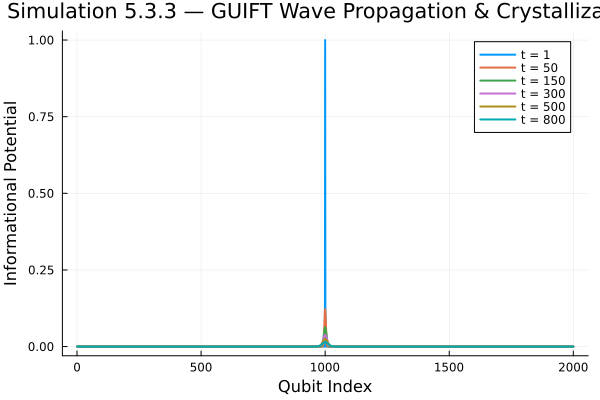

In [29]:
using Plots

# === Parameters ===
n_qubits = 2000              # Size of the qubit register
timesteps = 800              # Number of time steps to evolve
v = 0.1                      # Information propagation rate (scaled from α_U / k)
γ = 0.001                    # Damping coefficient (stabilization)
pulse_strength = 1.0         # Initial information pulse strength

# === Initialize informational potential field ===
info = zeros(Float64, timesteps, n_qubits)
center = div(n_qubits, 2)
info[1, center] = pulse_strength  # Inject at center

# === GUIFT-inspired evolution loop ===
for t in 1:timesteps-1
    for q in 2:n_qubits-1
        # Diffusion + curvature damping
        info[t+1, q] = info[t, q] + v * (info[t, q-1] - 2info[t, q] + info[t, q+1]) - γ * info[t, q]
    end
    # Reflective boundaries (simulate wave bounce)
    info[t+1, 1] = info[t+1, 2]
    info[t+1, end] = info[t+1, end-1]
end

# === Plot temporal snapshots to visualize propagation + crystallization ===
frame_idxs = [1, 50, 150, 300, 500, 800]
plot()
for idx in frame_idxs
    plot!(1:n_qubits, info[idx, :], label="t = $idx", lw=2)
end
xlabel!("Qubit Index")
ylabel!("Informational Potential")
title!("Simulation 5.3.3 — GUIFT Wave Propagation & Crystallization")